# Business Problem

1. **Objective**
   - To classifiy a review on scale of 1 to 5, with 5 representing postive sentiment and 1 representing negative sentiment
   - Learn from reviews and thier properties to predict the sentiment


2. **Machine Learning Problem**
   - Develop a machine learning model based on gated recurrent neural network to learn properties on a scale of 1 to 5 and predict accurately for new review


3. **Technology**
   - Python, Scikit-learn, tensorflow, keras, Numpy
   

4. **Decision making**
   - Select the best model which performs the best w.r.t classification accuracy
   - Metrics: Accuracy
   

5. **Deployment**
   - Deploy model in a scalable way so that business decisions can be taken in near real time to predict sentiment of reviews



**Dataset**<br>
App reviews

In [ ]:

!pip install keras==2.7.0
!pip install nltk==3.7
!pip install pandas==1.3.5
!pip install tensorflow==2.7.0
!pip install textblob==0.17.1
!pip install Pillow==9.0.0
!pip install scikit-learn==1.0.2
!pip install matplotlib==3.3.4
!pip install wordcloud==1.8.1

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hemje\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hemje\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from nltk.corpus import stopwords
from textblob import Word
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, GRU, SpatialDropout1D

In [3]:
df = pd.read_csv("input/review_data.csv")[["content", "score"]]
print(df.shape)

(1500, 2)


In [4]:
df.head()

,content,score
0,Overall it's really an amazing app. I've been ...,4
1,Hey! Yes I gave a 5 star rating... coz I belie...,5
2,Canva used to be a good app! But recently I've...,1
3,"It's a brilliant app, but I have just one prob...",5
4,This was such a great app. I used to make BTS ...,4


In [5]:
stop_words = stopwords.words('english')

In [6]:
def cleaning(df_tmp, stop_words):
    df_tmp = df.copy(deep=True)
    df_tmp['content'] = df_tmp['content'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

    # Replacing the special characters
    df_tmp['content'] = df_tmp['content'].str.replace("[^0-9a-zA-Z\s]+", '')

    # Replacing the digits/numbers
    #df_tmp['content'] = df_tmp['content'].str.replace('d', '')

    # Removing stop words
    df_tmp['content'] = df_tmp['content'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop_words))

    # Lemmatization
    df_tmp['content'] = df_tmp['content'].apply(lambda x: ' '.join([Word(x).lemmatize() for x in x.split()]))

    return df_tmp

In [7]:
top_words = 5000
input_length = 500

In [8]:
df_new = cleaning(df, stop_words)

e:\GRU-Neural-Network\gru\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [9]:
df_new.head()

,content,score
0,overall really amazing app ive using past 5 ye...,4
1,hey yes gave 5 star rating coz believe deserve...,5
2,canva used good app recently ive facing issue ...,1
3,brilliant app one problem im editing post doub...,5
4,great app used make bts meme recent update im ...,4


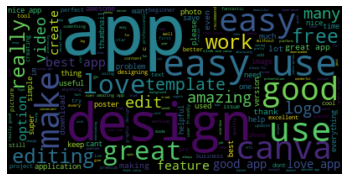

In [10]:
import wordcloud

common_words = ''
for i in df_new.content:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "

wordcloud = wordcloud.WordCloud().generate(common_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(df_new['content'].values)

X = tokenizer.texts_to_sequences(df['content'].values)
X = pad_sequences(X, input_length)

In [12]:
X.shape

(1500, 500)

In [13]:
#Splitting the data into training and testing
y = pd.get_dummies(df['score'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
model = Sequential()
model.add(Embedding(input_length, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 120)          60000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 500, 120)         0         
 ropout1D)                                                       
                                                                 
 gru (GRU)                   (None, 64)                35712     
                                                                 
 dense (Dense)               (None, 5)                 325       
                                                                 
Total params: 96,037
Trainable params: 96,037
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
batch_size=32
epochs=50
history = model.fit(X_train, y_train, epochs = epochs, batch_size=batch_size, verbose = 'auto')

Epoch 1/5
38/38 [==============================] - 13s 330ms/step - loss: 0.9286 - accuracy: 0.6408
Epoch 2/5
38/38 [==============================] - 12s 314ms/step - loss: 0.8088 - accuracy: 0.6950
Epoch 3/5
38/38 [==============================] - 12s 317ms/step - loss: 0.7199 - accuracy: 0.7267
Epoch 4/5
38/38 [==============================] - 12s 317ms/step - loss: 0.6539 - accuracy: 0.7508
Epoch 5/5
38/38 [==============================] - 12s 316ms/step - loss: 0.6088 - accuracy: 0.7667


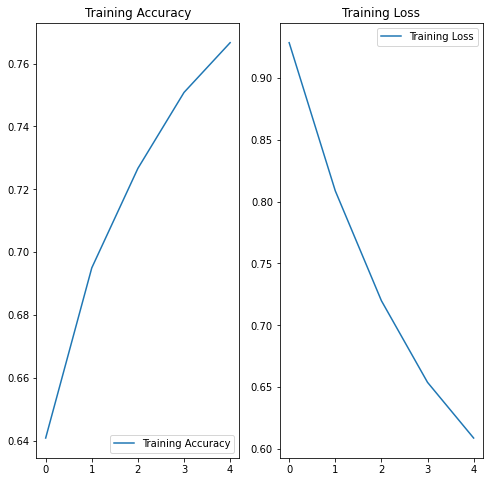

In [17]:
acc = history.history['accuracy']

loss = history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [18]:
#model.save("output/gru-model.h5")

In [19]:
model = tf.keras.models.load_model("output/gru-model.h5")

## Prediction

In [20]:
scores = model.evaluate(X_test, y_test)

10/10 [==============================] - 1s 36ms/step - loss: 0.7438 - accuracy: 0.7500


In [21]:
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 75.00%
